# **Exploratory Data Analysis of the Lex Fridman Podcast**

This analysis is based upon a web scraping I did on the **10th of November, 2024**. So any guests who apeared after that won't be inlcuded.

### Import the packages and load the data

Now I'll import all important packages to do my analysis and modeling:

In [ ]:
# Import data manipulation and visualization packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
import pytz
from ydata_profiling import ProfileReport

# Import scikit-learn packages for model building, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import (recall_score, precision_score, f1_score, accuracy_score,
                             confusion_matrix, classification_report, ConfusionMatrixDisplay,
                             roc_curve, roc_auc_score, auc, RocCurveDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import XGBoost
from xgboost import XGBClassifier, plot_importance

# Import statsmodels and related utilities
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Other utilities
import pickle  # For model saving and reuse

In [3]:
lex_df0 = pd.read_csv('Lex Fridman Podcast Episodes.csv')

In [4]:
lex_df0.head()

,Unnamed: 0,yt_url,number,guest,nationality,profession,birth_year,death_year,birth_year_estimated,summary,...,duration_minutes,views,likes,comments_count,tags,top_five_words,favorite_count,region_restriction,thumbnail_url,captions_availability
0,0,https://www.youtube.com/watch?v=abd5hguWKz0,451,Rick Spence,American,Historian,1952,0,False,"CIA, KGB, Illuminati, Secret Societies, Cults ...",...,208.333333,901686,14696,2037,"['Rick Spence', 'alex friedman', 'lex ai', 'le...","jews-51, part-50, idea-49, german-49, intellig...",0,NaN,https://i.ytimg.com/vi/abd5hguWKz0/hqdefault.jpg,True
1,1,https://www.youtube.com/watch?v=MzkgWDCucNY,450,Bernie Sanders,American,Politician,1941,0,False,NaN,...,62.533333,1218968,23415,5665,"['Bernie Sanders', 'alex friedman', 'lex ai', ...","right-56, money-39, working-28, country-28, he...",0,NaN,https://i.ytimg.com/vi/MzkgWDCucNY/hqdefault.jpg,True
2,2,https://www.youtube.com/watch?v=NMHiLvirCb0,449,Graham Hancock,British,Writer,1950,0,False,Lost Civilization of the Ice Age & Ancient Hum...,...,153.033333,2656311,43799,7821,"['Graham Hancock', 'alex friedman', 'lex ai', ...","ago-63, civilization-60, human-53, ancient-48,...",0,NaN,https://i.ytimg.com/vi/NMHiLvirCb0/hqdefault.jpg,True
3,3,https://www.youtube.com/watch?v=q8VePUwjB9Y,448,Jordan Peterson,Canadian,Psychologist,1962,0,False,"Nietzsche, Hitler, God, Psychopathy, Suffering...",...,143.083333,1132848,25316,4191,"['Jordan Peterson', 'alex friedman', 'lex ai',...","right-84, god-40, ideas-37, idea-36, nietzsche-33",0,NaN,https://i.ytimg.com/vi/q8VePUwjB9Y/hqdefault.jpg,True
4,4,https://www.youtube.com/watch?v=oFfVt3S51T4,447,Cursor Team,Mixed,Computer Scientist,0,0,False,Future of Programming with AI,...,149.083333,488086,9397,881,"['Cursor Team', 'alex friedman', 'lex ai', 'le...","code-194, model-156, models-110, programming-5...",0,NaN,https://i.ytimg.com/vi/oFfVt3S51T4/hqdefault.jpg,True


I can see that the dataset has 474 rows, and 23 columns.

### Gather basic information about the data

In [5]:
lex_df0.shape

(474, 23)

In [6]:
lex_df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             474 non-null    int64  
 1   yt_url                 474 non-null    object 
 2   number                 474 non-null    int64  
 3   guest                  474 non-null    object 
 4   nationality            474 non-null    object 
 5   profession             474 non-null    object 
 6   birth_year             474 non-null    int64  
 7   death_year             474 non-null    int64  
 8   birth_year_estimated   474 non-null    bool   
 9   summary                470 non-null    object 
 10  description            409 non-null    object 
 11  upload_date            474 non-null    object 
 12  duration               474 non-null    object 
 13  duration_minutes       474 non-null    float64
 14  views                  474 non-null    int64  
 15  likes 

From the above info, I'll modify the types of `upload_date` column.

### Gather descriptive statistics about the data

In [7]:
# Gather descriptive statistics about the numercial variables
lex_df0.describe()

,Unnamed: 0,number,birth_year,death_year,duration_minutes,views,likes,comments_count,favorite_count
count,474.000000,474.000000,474.000000,474.000000,474.000000,4.740000e+02,474.000000,474.000000,474.0
mean,236.500000,230.658228,1935.810127,12.801688,147.284423,1.956710e+06,27279.166667,4112.449367,0.0
std,136.976275,129.481995,254.307146,160.574190,61.244514,3.074238e+06,40125.726425,8545.949222,0.0
min,0.000000,1.000000,0.000000,0.000000,32.750000,2.092800e+04,572.000000,29.000000,0.0
25%,118.250000,121.250000,1959.000000,0.000000,104.270833,2.468805e+05,5262.250000,475.750000,0.0
50%,236.500000,235.500000,1970.000000,0.000000,143.108333,7.470020e+05,13268.000000,1489.500000,0.0
75%,354.750000,341.750000,1980.000000,0.000000,182.883333,1.978190e+06,29214.750000,4018.500000,0.0
max,473.000000,451.000000,2000.000000,2024.000000,517.583333,1.873058e+07,268977.000000,60877.000000,0.0


From the above, I can see the following:
* The index 'Unnamed' column must be dropped.
* The number of guests that have died is too small.
* The average duration of episodes in minutes is 147 minutes, and the median is 143 minutes, so the `duration_minutes` variables would resemble a normal distribution.
* The average number of views is much larger than the median, so the `views` variables would resemble a right-skewed distribution.
* The average number of likes is also much larger than the median, so the `likes` variables would resemble a right-skewed distribution.
* The average number of comments is also much larger than the median, so the `comments_count` variables would resemble a right-skewed distribution.
* The `favorite_count` variable appears to be all zeros, so it must be dropped.

In [8]:
# Gather descriptive statistics about the categorical variables
lex_df0.describe(include=['object', 'bool', 'category'])

,yt_url,guest,nationality,profession,birth_year_estimated,summary,description,upload_date,duration,tags,top_five_words,region_restriction,thumbnail_url,captions_availability
count,474,474,474,474,474,470,409,474,474,406,474,2,474,474
unique,449,380,58,95,2,444,384,449,440,373,130,1,449,2
top,https://www.youtube.com/watch?v=cC1LFC0KFSw,Michael Malice,American,Computer Scientist,False,US Most Wanted Cybercriminal,Coffeezilla is a journalist and investigator o...,2022-03-27 16:42:48+00:00,0 days 03:34:58,"['manolis kellis', 'artificial intelligence', ...",no captions available,{'blocked': ['RU']},https://i.ytimg.com/vi/cC1LFC0KFSw/hqdefault.jpg,False
freq,2,7,288,57,436,2,2,2,3,4,328,2,2,327


From the above, I can see the following:
* There seem to be duplicated URLs (449 unique URLs and episode uploading dates out of 474), meaning duplicated episodes; we shall investigate those.
* There are 380 unique guests in the podcast, out of 449 unique episodes, around 15% of the episodes were guests who came at least once before.
* *5 episodes seem to have no summary for them.*
* 65 episodes seem to have no description for them.
* 9 episodes have the exact same duration! This number is very high for a unique occurrence like these to happen, so it must be investigated.
* *76 episodes are missing YouTube tags.*
* 319 episodes are missing top five words list, therefore transcripts.
* There seem to be very small occurrences of regional restriction.

### Check missing values

In [9]:
# Check for missing values
lex_df0.isnull().sum()

Unnamed: 0                 0
yt_url                     0
number                     0
guest                      0
nationality                0
profession                 0
birth_year                 0
death_year                 0
birth_year_estimated       0
summary                    4
description               65
upload_date                0
duration                   0
duration_minutes           0
views                      0
likes                      0
comments_count             0
tags                      68
top_five_words             0
favorite_count             0
region_restriction       472
thumbnail_url              0
captions_availability      0
dtype: int64

From the above, we can see that there are several variables that has nulls.

### Check duplicates

First we'll drop the index 'unnamed' column from the dataset.

In [10]:
lex_df0.columns

Index(['Unnamed: 0', 'yt_url', 'number', 'guest', 'nationality', 'profession',
       'birth_year', 'death_year', 'birth_year_estimated', 'summary',
       'description', 'upload_date', 'duration', 'duration_minutes', 'views',
       'likes', 'comments_count', 'tags', 'top_five_words', 'favorite_count',
       'region_restriction', 'thumbnail_url', 'captions_availability'],
      dtype='object')

In [11]:
lex_df0.drop(columns='Unnamed: 0', inplace=True)

In [12]:
lex_df0.head()

,yt_url,number,guest,nationality,profession,birth_year,death_year,birth_year_estimated,summary,description,...,duration_minutes,views,likes,comments_count,tags,top_five_words,favorite_count,region_restriction,thumbnail_url,captions_availability
0,https://www.youtube.com/watch?v=abd5hguWKz0,451,Rick Spence,American,Historian,1952,0,False,"CIA, KGB, Illuminati, Secret Societies, Cults ...",Rick Spence is a historian specializing in the...,...,208.333333,901686,14696,2037,"['Rick Spence', 'alex friedman', 'lex ai', 'le...","jews-51, part-50, idea-49, german-49, intellig...",0,NaN,https://i.ytimg.com/vi/abd5hguWKz0/hqdefault.jpg,True
1,https://www.youtube.com/watch?v=MzkgWDCucNY,450,Bernie Sanders,American,Politician,1941,0,False,NaN,Bernie Sanders is a US Senator from Vermont an...,...,62.533333,1218968,23415,5665,"['Bernie Sanders', 'alex friedman', 'lex ai', ...","right-56, money-39, working-28, country-28, he...",0,NaN,https://i.ytimg.com/vi/MzkgWDCucNY/hqdefault.jpg,True
2,https://www.youtube.com/watch?v=NMHiLvirCb0,449,Graham Hancock,British,Writer,1950,0,False,Lost Civilization of the Ice Age & Ancient Hum...,Graham Hancock a journalist and author who for...,...,153.033333,2656311,43799,7821,"['Graham Hancock', 'alex friedman', 'lex ai', ...","ago-63, civilization-60, human-53, ancient-48,...",0,NaN,https://i.ytimg.com/vi/NMHiLvirCb0/hqdefault.jpg,True
3,https://www.youtube.com/watch?v=q8VePUwjB9Y,448,Jordan Peterson,Canadian,Psychologist,1962,0,False,"Nietzsche, Hitler, God, Psychopathy, Suffering...","Jordan Peterson is a psychologist, author, lec...",...,143.083333,1132848,25316,4191,"['Jordan Peterson', 'alex friedman', 'lex ai',...","right-84, god-40, ideas-37, idea-36, nietzsche-33",0,NaN,https://i.ytimg.com/vi/q8VePUwjB9Y/hqdefault.jpg,True
4,https://www.youtube.com/watch?v=oFfVt3S51T4,447,Cursor Team,Mixed,Computer Scientist,0,0,False,Future of Programming with AI,"Aman Sanger, Arvid Lunnemark, Michael Truell, ...",...,149.083333,488086,9397,881,"['Cursor Team', 'alex friedman', 'lex ai', 'le...","code-194, model-156, models-110, programming-5...",0,NaN,https://i.ytimg.com/vi/oFfVt3S51T4/hqdefault.jpg,True


In [13]:
# Check for duplicates
lex_df0.duplicated().sum()

24

In [14]:
# Drop duplicates and save resulting dataframe in a new variable as needed
lex_df = lex_df0.drop_duplicates(keep = 'first')

# Check if all duplicates were removed
print("Number of duplicated rows removed: ", lex_df0.shape[0] - lex_df.shape[0])

Number of duplicated rows removed:  24


From the above descriptive statistics we've seen that there are 449 unique URLs, and knowing the total number of rows is 474, so the 474-449= 25, so there's one duplicated URL that has other variables related to it that are not unique, let's check it out.

In [15]:
# Display rows where 'yt_url' is duplicated
duplicates = lex_df[lex_df.duplicated(subset='yt_url', keep=False)]
duplicates.sort_values(by= 'guest')

,yt_url,number,guest,nationality,profession,birth_year,death_year,birth_year_estimated,summary,description,...,duration_minutes,views,likes,comments_count,tags,top_five_words,favorite_count,region_restriction,thumbnail_url,captions_availability
158,https://www.youtube.com/watch?v=reYdQYZ9Rj4,293,Donald Hoffman,American,Psychologist,1955,0,False,Reality is an Illusion - How Evolution Hid the...,Donald Hoffman is a cognitive scientist at UC ...,...,196.266667,9470932,91631,15537,"['agi', 'ai', 'ai podcast', 'artificial intell...","space-233, consciousness-167, right-137, theor...",0,NaN,https://i.ytimg.com/vi/reYdQYZ9Rj4/hqdefault.jpg,True
459,https://www.youtube.com/watch?v=reYdQYZ9Rj4,293,Donald Hoffman,American,Psychologist,1955,0,False,Reality is an Illusion - How Evolution Hid the...,Donald Hoffman is a cognitive scientist at UC ...,...,196.266667,9470932,91631,15537,"['agi', 'ai', 'ai podcast', 'artificial intell...",no captions available,0,NaN,https://i.ytimg.com/vi/reYdQYZ9Rj4/hqdefault.jpg,True


From the above, we can see that the there are two rows with the same episode 293 with Donald Hoffman, but one of them doesn't have the `top_five_words`, I'll keep that has it.

In [16]:
# Remove the row with index 459
lex_df = lex_df.drop(index=459)

# Reset the index and drop the old index column
lex_df = lex_df.reset_index(drop=True)

Now let's see if there is a difference between the number of rows we have in our dataset, the number of unique URLs, and the latest episode number.

In [17]:
lex_df.shape[0] - lex_df['yt_url'].nunique()

0

In [18]:
lex_df['number'].max()

451

We see that there are 451 episodes, so there might be some 2 lost episodes, let's check it out by creating a new column that sees the difference between each episode number and the one before it

In [19]:
# First let's sort the dataset by the number of the episodes
lex_df = lex_df.sort_values(by= 'number')

# Create a new column 'episode_diff' that calculates the difference between each episode and the one before it
lex_df['episode_diff'] = lex_df['number'].diff()

# Display rows where 'episode_diff' is not equal to 1
non_sequential_episodes = lex_df[lex_df['episode_diff'] != 1]

non_sequential_episodes

,yt_url,number,guest,nationality,profession,birth_year,death_year,birth_year_estimated,summary,description,...,views,likes,comments_count,tags,top_five_words,favorite_count,region_restriction,thumbnail_url,captions_availability,episode_diff
448,https://www.youtube.com/watch?v=Gi8LUnhP5yU,1,Max Tegmark,Swedish-American,Cosmologist,1967,0,False,Life 3.0,NaN,...,324215,9053,605,NaN,no captions available,0,NaN,https://i.ytimg.com/vi/Gi8LUnhP5yU/hqdefault.jpg,False,NaN
365,https://www.youtube.com/watch?v=orMtwOz6Db0,85,Roger Penrose,British,Physicist,1931,0,False,Physics of Consciousness and the Infinite Univ...,"Roger Penrose is physicist, mathematician, and...",...,2208917,39710,2697,"['roger penrose', 'big bang', 'cosmology', 'qu...",no captions available,0,NaN,https://i.ytimg.com/vi/orMtwOz6Db0/hqdefault.jpg,False,2.0
350,https://www.youtube.com/watch?v=P-2P3MSZrBM,101,Joscha Bach,German,Scientist,1973,0,False,Artificial Consciousness and the Nature of Rea...,Joscha Bach is the VP of Research at the AI Fo...,...,1999294,29281,4061,"['joscha bach', 'agi', 'artificial intelligenc...",no captions available,0,NaN,https://i.ytimg.com/vi/P-2P3MSZrBM/hqdefault.jpg,False,2.0


From the above, we'll ignore the first row, because it's the first episode, let's check the other two episodes one by one.

In [20]:
# First before and after episode 85
rows_around_365 = lex_df.loc[[364, 365, 366]]
rows_around_365

,yt_url,number,guest,nationality,profession,birth_year,death_year,birth_year_estimated,summary,description,...,views,likes,comments_count,tags,top_five_words,favorite_count,region_restriction,thumbnail_url,captions_availability,episode_diff
364,https://www.youtube.com/watch?v=uPUEq8d73JI,86,David Silver,British,Computer Scientist,1976,0,False,"AlphaGo, AlphaZero, and Deep Reinforcement Lea...",David Silver leads the reinforcement learning ...,...,392574,9230,458,"['david silver', 'deep rl', 'deepmind', 'googl...",no captions available,0,NaN,https://i.ytimg.com/vi/uPUEq8d73JI/hqdefault.jpg,False,1.0
365,https://www.youtube.com/watch?v=orMtwOz6Db0,85,Roger Penrose,British,Physicist,1931,0,False,Physics of Consciousness and the Infinite Univ...,"Roger Penrose is physicist, mathematician, and...",...,2208917,39710,2697,"['roger penrose', 'big bang', 'cosmology', 'qu...",no captions available,0,NaN,https://i.ytimg.com/vi/orMtwOz6Db0/hqdefault.jpg,False,2.0
366,https://www.youtube.com/watch?v=rfKiTGj-zeQ,83,Nick Bostrom,Swedish,Philosopher,1973,0,False,Simulation and Superintelligence,Nick Bostrom is a philosopher at University of...,...,930374,14405,1548,"['nick bostrom', 'Simulation', 'Superintellige...",no captions available,0,NaN,https://i.ytimg.com/vi/rfKiTGj-zeQ/hqdefault.jpg,False,1.0


In [21]:
# First before and after episode 101
rows_around_350 = lex_df.loc[[349, 350, 351]]
rows_around_350

,yt_url,number,guest,nationality,profession,birth_year,death_year,birth_year_estimated,summary,description,...,views,likes,comments_count,tags,top_five_words,favorite_count,region_restriction,thumbnail_url,captions_availability,episode_diff
349,https://www.youtube.com/watch?v=PgtedwKGhXs,102,Steven Pressfield,American,Novelist,1943,0,False,The War of Art,Steven Pressfield is a historian and author of...,...,103271,2923,209,"['steven pressfield', 'do the work', 'producti...",no captions available,0,NaN,https://i.ytimg.com/vi/PgtedwKGhXs/hqdefault.jpg,False,1.0
350,https://www.youtube.com/watch?v=P-2P3MSZrBM,101,Joscha Bach,German,Scientist,1973,0,False,Artificial Consciousness and the Nature of Rea...,Joscha Bach is the VP of Research at the AI Fo...,...,1999294,29281,4061,"['joscha bach', 'agi', 'artificial intelligenc...",no captions available,0,NaN,https://i.ytimg.com/vi/P-2P3MSZrBM/hqdefault.jpg,False,2.0
351,https://www.youtube.com/watch?v=NwzuibY5kUs,99,Karl Friston,British,Neuroscientist,1959,0,False,Neuroscience and the Free Energy Principle,Karl Friston is one of the greatest neuroscien...,...,152954,4264,385,"['karl friston', 'neurobiology', 'machine lear...",no captions available,0,NaN,https://i.ytimg.com/vi/NwzuibY5kUs/hqdefault.jpg,False,1.0


We can see that episode 84 and episode 100 are missing.

After doing some reaserch, I found that both episodes were removed from his youtube chanel:
- **Episode #84 – William MacAskill:** Effective Altruism (Episode 84 of the Lex Fridman Podcast, featuring William MacAskill, has been removed due to its connection with the Sam Bankman-Fried (SBF) controversy. The episode was part of a broader discussion surrounding Effective Altruism, which SBF had publicly supported before his legal troubles. Following SBF's conviction for fraud related to the collapse of FTX, there has been increased scrutiny on all content associated with him, including previous podcast episodes that may have seemed to endorse or align with his views on altruism and ethics in finance) https://www.listennotes.com/podcasts/lex-fridman-podcast/84-william-macaskill-ByH05_eqzRQ/ 

- **Epispode #100 – Alexander Fridman:** My Dad, the Plasma Physicist (Episode 100 of the Lex Fridman Podcast, featuring a conversation with his father, Alexander Fridman, has been reported as unavailable across various platforms, including YouTube. Likely due to the presence of books related to Zionism, which could have sparked controversy or criticism from some viewers, especially given the sensitive nature of discussions around Israel and Palestine) https://podcastaddict.com/lex-fridman-podcast/episode/107288467 

But I can manualy add those back to the dataset:

In [22]:
missing_episodes = pd.DataFrame([{
    'yt_url': None,
    'number': 84,
    'guest': 'William MacAskill',
    'nationality': 'Scottish',
    'profession': 'Philosopher',
    'birth_year': 1987,
    'death_year': None,
    'birth_year_estimated': False,
    'summary': 'Effective Altruism',
    'description': 'William MacAskill is a philosopher, ethicist, and one of the originators of the effective altruism movement. His research focuses on the fundamentals of effective altruism – the use of evidence and reason to help others by as much as possible with our time and money, with a particular concentration on how to act given moral uncertainty. He is the author of Doing Good Better – Effective Altruism and a Radical New Way to Make a Difference. He is a co-founder and the President of the Centre for Effective Altruism (CEA) that encourages people to commit to donate at least 10%',
    'upload_date': '2020-03-29 00:00:00+00:00',
    'duration': '0 days 01:31:09',
    'duration_minutes': 91,
    'views': 0,
    'likes': 0,
    'comments_count': 0,
    'tags': None,
    'top_five_words': None,
    'favorite_count': 0,
    'region_restriction': 'deleted from youtube',
    'thumbnail_url': 'https://lexfridman.com/files/thumbs_ai_podcast/william_macaskill.png',
    'captions_availability': False,
    'episode_diff': 1
}, {
    'yt_url': None,
    'number': 100,
    'guest': 'Alexander Fridman',
    'nationality': 'Russian-American',
    'profession': 'Physicist',
    'birth_year': 1950,
    'death_year': None,
    'birth_year_estimated': True,
    'summary': 'My Dad, the Plasma Physicist',
    'description': 'Alexander Fridman is a professor at Drexel University and the director of the Nyheim Plasma Institute. He is one of the top plasma physicists and plasma chemists in the world. And most importantly to me, he is my dad.',
    'upload_date': '2020-06-03 00:00:00+00:00',
    'duration': '0 days 03:39:00',
    'duration_minutes': 219,
    'views': 0,
    'likes': 0,
    'comments_count': 0,
    'tags': None,
    'top_five_words': None,
    'favorite_count': 0,
    'region_restriction': 'deleted from youtube',
    'thumbnail_url': 'https://i0.wp.com/www.franksworld.com/wp-content/uploads/2020/06/af100.jpg?w=1280&ssl=1',
    'captions_availability': False,
    'episode_diff': 1
}])

# Append the missing episodes to the original DataFrame
lex_df = pd.concat([lex_df, missing_episodes], ignore_index=True)

Now let's check if the number of rows in our dataset is the same as the maximum episode number:

In [23]:
lex_df.shape[0] - lex_df['number'].max()

0

Let's check again if there are any differences between the episodes numbers other than 1:

In [24]:
# First let's sort the dataset by the number of the episodes
lex_df = lex_df.sort_values(by= 'number')

# Create a new column 'episode_diff' that calculates the difference between each episode and the one before it
lex_df['episode_diff'] = lex_df['number'].diff()

# Display rows where 'episode_diff' is not equal to 1
non_sequential_episodes = lex_df[lex_df['episode_diff'] != 1]

non_sequential_episodes

,yt_url,number,guest,nationality,profession,birth_year,death_year,birth_year_estimated,summary,description,...,views,likes,comments_count,tags,top_five_words,favorite_count,region_restriction,thumbnail_url,captions_availability,episode_diff
0,https://www.youtube.com/watch?v=Gi8LUnhP5yU,1,Max Tegmark,Swedish-American,Cosmologist,1967,0,False,Life 3.0,NaN,...,324215,9053,605,NaN,no captions available,0,NaN,https://i.ytimg.com/vi/Gi8LUnhP5yU/hqdefault.jpg,False,NaN


The episodes were properly added, now let's drop the helping `episode_diff` column we created

In [25]:
lex_df.drop(columns='episode_diff', inplace=True)

### Check outliers

In [26]:
# Define a function to identify, visualize and isolate the outliers in a DataFrame column
def outlier_box_plot(df, column, iqr_factor):
    """
    Analyzes a DataFrame column and returns a DataFrame containing outliers best on a defined interquartile range.

    Args:
        df (pandas.DataFrame): The DataFrame to analyze
        column (str): The column name to analyze
        iqr_factor (float): The factor to use when calculating IQR outlier thresholds

    Returns:
        outliers: A DataFrame containing outliers identified based on IQR.
    """

    # Calculate mean and median of the data
    mean = np.mean(df[column])
    median = np.median(df[column])
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print()

    # Calculate the 25th percentile (Q1) and 75th percentile (Q3)
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Calculate upper and lower thresholds for outliers
    lower_limit = q1 - iqr_factor * iqr
    upper_limit = q3 + iqr_factor * iqr
    print(f'Lower limit is: {lower_limit}')
    print(f'Upper limit is: {upper_limit}')

    # Create a boxplot of the data to visualize the distribution and outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column], whis=iqr_factor)
    plt.xlabel('Data')
    plt.title(f'{column} Data Distribution')
    plt.show()

    # Use a Boolean mask to select only the rows of the dataframe that contain outlier values
    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]

    return outliers

Now I'll the fucntion I created to detect any outliers in the numerical variables we have

In [27]:
# Show only numerical variables
lex_df.select_dtypes(include=['number']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 451 entries, 0 to 448
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number            451 non-null    int64  
 1   birth_year        451 non-null    int64  
 2   duration_minutes  451 non-null    float64
 3   views             451 non-null    int64  
 4   likes             451 non-null    int64  
 5   comments_count    451 non-null    int64  
 6   favorite_count    451 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 28.2 KB


**Birth Year**

count     443.000000
mean     1969.060948
std        14.553797
min      1928.000000
25%      1959.000000
50%      1970.000000
75%      1981.000000
max      2000.000000
Name: birth_year, dtype: float64

Mean: 1969.060948081264
Median: 1970.0

Lower limit is: 1926.0
Upper limit is: 2014.0


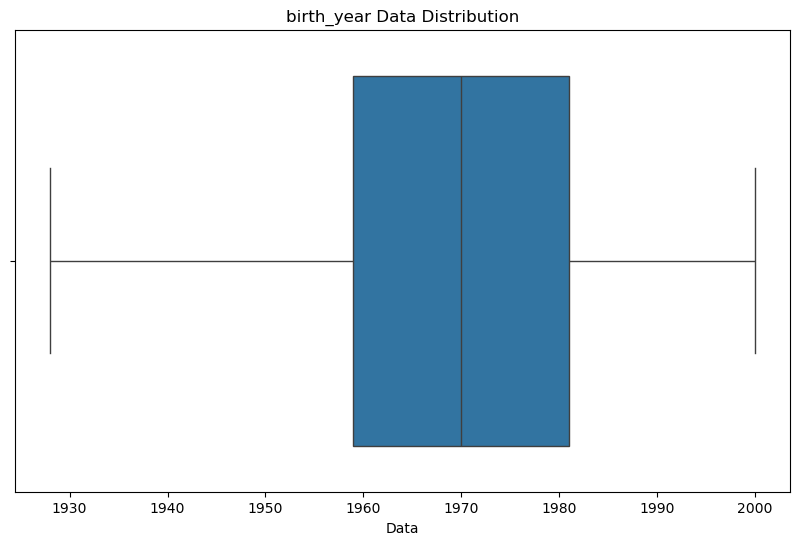

In [28]:
# Remove rows where 'birth_year' is zero before applying the function
lex_df_temp = lex_df[lex_df['birth_year'] != 0]

# Print max and min values
print(lex_df_temp['birth_year'].describe())
print()

# Now apply the outlier_box_plot function
outliers = outlier_box_plot(lex_df_temp, 'birth_year', 1.5)

**Duration in Minutes**

Mean: 145.26393200295638
Median: 141.46666666666667

Lower limit is: -12.499999999999986
Upper limit is: 295.7


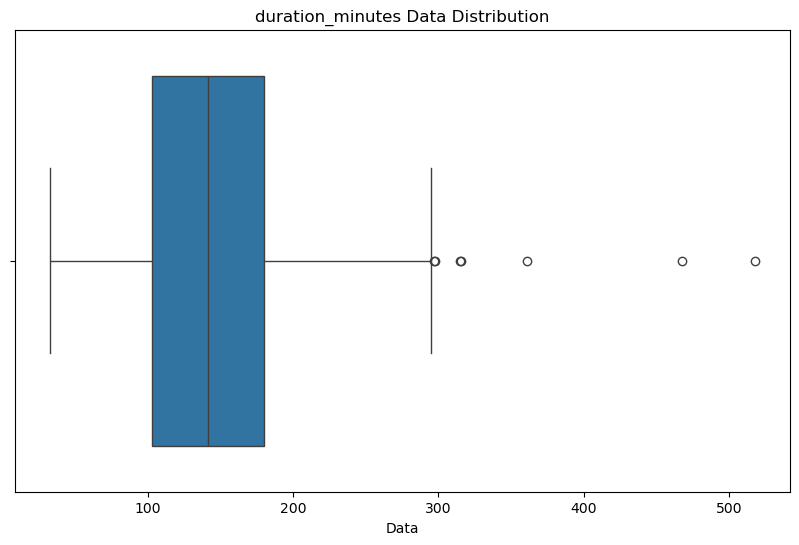

In [29]:
# Apply the outlier_box_plot function
outliers = outlier_box_plot(lex_df, 'duration_minutes', 1.5)

In [30]:
# Check instances of durations more than 295.7 (4 hours, 55 minutes, and 42 seconds)
lex_df[lex_df['duration_minutes'] > 295.7].sort_values('duration_minutes', ascending=False)

,yt_url,number,guest,nationality,profession,birth_year,death_year,birth_year_estimated,summary,description,...,duration_minutes,views,likes,comments_count,tags,top_five_words,favorite_count,region_restriction,thumbnail_url,captions_availability
435,https://www.youtube.com/watch?v=Kbk9BiPhm7o,438,Elon Musk,American-South African,Entrepreneur,1971,0,False,Neuralink and the Future of Humanity,"Elon Musk is CEO of Neuralink, SpaceX, Tesla, ...",...,517.583333,3825631,81606,9260,"['Elon Musk and Neuralink Team', 'alex friedma...","brain-316, right-232, human-146, first-144, cu...",0,NaN,https://i.ytimg.com/vi/Kbk9BiPhm7o/hqdefault.jpg,True
328,https://www.youtube.com/watch?v=VeH7qKZr0WI,331,Balaji Srinivasan,American,Entrepreneur,1980,0,False,"How to Fix Government, Twitter, Science, and t...","Balaji Srinivasan is an angel investor, tech f...",...,467.866667,933759,18097,2910,"['agi', 'ai', 'ai podcast', 'artificial intell...",no captions available,0,NaN,https://i.ytimg.com/vi/VeH7qKZr0WI/hqdefault.jpg,False
406,https://www.youtube.com/watch?v=zMYvGf7BA9o,409,Matthew Cox,American,Former Con Man,1969,0,False,FBI Most Wanted Con Man - $55 Million in Bank ...,Matthew Cox is a former con man who served 13 ...,...,360.900000,1261930,22095,3698,"['agi', 'ai', 'ai podcast', 'artificial intell...","right-246, goes-195, bank-153, money-146, guy-138",0,NaN,https://i.ytimg.com/vi/zMYvGf7BA9o/hqdefault.jpg,True
353,https://www.youtube.com/watch?v=5eK5A_43pkE,356,Tim Dodd,American,Space Science Communicator,1985,0,False,"SpaceX, Starship, Rocket Engines, and Future o...",Tim Dodd is host of the Everyday Astronaut You...,...,315.750000,725798,17354,2020,"['America', 'Black holes', 'Rockets', 'Russia'...","space-200, rocket-193, engine-165, first-138, ...",0,NaN,https://i.ytimg.com/vi/5eK5A_43pkE/hqdefault.jpg,True
306,https://www.youtube.com/watch?v=I845O57ZSy4,309,John Carmack,American,Computer Scientist,1970,0,False,"Doom, Quake, VR, AGI, Programming, Video Games...","John Carmack is a legendary programmer, co-fou...",...,314.850000,1634244,40949,3879,"['agi', 'ai', 'ai podcast', 'artificial intell...",no captions available,0,NaN,https://i.ytimg.com/vi/I845O57ZSy4/hqdefault.jpg,False
189,https://www.youtube.com/watch?v=FKh8hjJNhWc,192,Charles Hoskinson,American,Entrepreneur,1987,0,False,Cardano,"Charles Hoskinson is the founder of Cardano, c...",...,297.850000,776711,28405,3768,"['agi', 'ai', 'ai podcast', 'artificial intell...",no captions available,0,NaN,https://i.ytimg.com/vi/FKh8hjJNhWc/hqdefault.jpg,False
415,https://www.youtube.com/watch?v=1X_KdkoGxSs,418,"Norman Finkelstein, Destiny, M. Rabbani & Benn...",Mixed,Mixed,0,0,False,"Finkelstein, Destiny, M. Rabbani & Benny Morris",Norman Finkelstein and Benny Morris are histor...,...,297.250000,3450546,67991,60633,"['agi', 'ai', 'ai podcast', 'artificial intell...","state-193, israel-186, arab-140, jews-137, jew...",0,NaN,https://i.ytimg.com/vi/1X_KdkoGxSs/hqdefault.jpg,True


All episodes are actually these extreme in length, so tehy're not errors and I'll leave them.

**Views Counts**

count    4.490000e+02
mean     1.524910e+06
std      2.411521e+06
min      2.092800e+04
25%      2.369930e+05
50%      6.525510e+05
75%      1.792460e+06
max      1.873058e+07
Name: views, dtype: float64

Mean: 1524909.661469933
Median: 652551.0

Lower limit is: -2096207.5
Upper limit is: 4125660.5


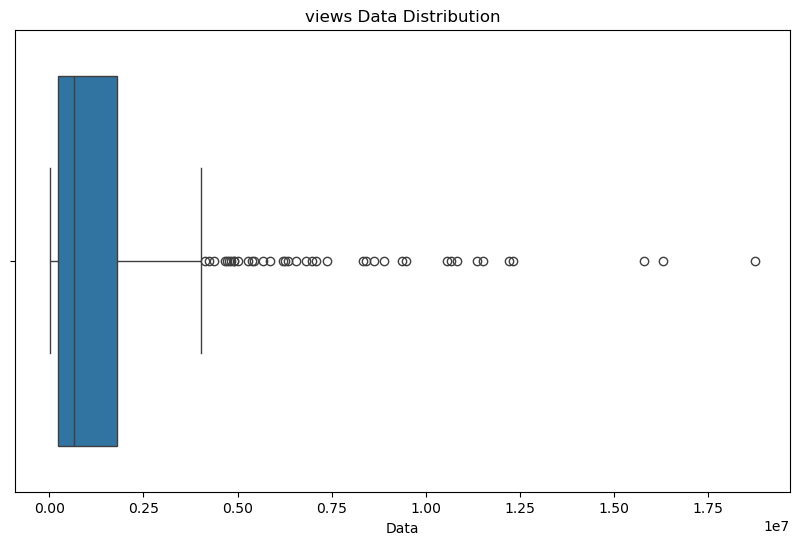

In [31]:
# Remove rows where 'birth_year' is zero before applying the function
lex_df_temp = lex_df[lex_df['views'] != 0]

# Print max and min values
print(lex_df_temp['views'].describe())
print()

# Now apply the outlier_box_plot function
outliers = outlier_box_plot(lex_df_temp, 'views', 1.5)

In [32]:
# Check instances of views more than 4,125,660 views
lex_df[lex_df['views'] > 4125660.5].sort_values('views', ascending=False)

,yt_url,number,guest,nationality,profession,birth_year,death_year,birth_year_estimated,summary,description,...,duration_minutes,views,likes,comments_count,tags,top_five_words,favorite_count,region_restriction,thumbnail_url,captions_availability
307,https://www.youtube.com/watch?v=T3FC7qIAGZk,310,Andrew Bustamante,American,Former Intelligence Officer,1981,0,False,CIA Spy,Andrew Bustamante is a former CIA covert intel...,...,233.150000,18730585,126034,24570,"['agi', 'ai', 'ai podcast', 'andrew bustamante...","intelligence-130, cia-127, right-111, ukraine-...",0,NaN,https://i.ytimg.com/vi/T3FC7qIAGZk/hqdefault.jpg,True
411,https://www.youtube.com/watch?v=f_lRdkH_QoY,414,Tucker Carlson,American,Political Commentator,1969,0,False,"Putin, Navalny, Trump, CIA, NSA, War, Politics...",Tucker Carlson is a highly-influential politic...,...,184.366667,16288203,268977,60877,"['agi', 'ai', 'ai podcast', 'artificial intell...","putin-71, us-69, country-67, true-63, right-61",0,NaN,https://i.ytimg.com/vi/f_lRdkH_QoY/hqdefault.jpg,True
310,https://www.youtube.com/watch?v=sY8aFSY2zv4,313,Jordan Peterson,Canadian,Psychologist,1962,0,False,"Life, Death, Power, Fame, and Meaning","Jordan Peterson is a psychologist, lecturer, p...",...,183.550000,15789816,182945,20446,"['Canada', 'Dostoevsky', 'Justin Trudeau', 'Ni...","right-121, talk-53, sense-48, question-43, hum...",0,NaN,https://i.ytimg.com/vi/sY8aFSY2zv4/hqdefault.jpg,True
397,https://www.youtube.com/watch?v=JN3KPFbWCy8,400,Elon Musk,American-South African,Entrepreneur,1971,0,False,"War, AI, Aliens, Politics, Physics, Video Game...","Elon Musk is CEO of X, xAI, SpaceX, Tesla, Neu...",...,136.783333,12308958,186949,21938,"['agi', 'ai', 'ai podcast', 'artificial intell...","laughing-77, elon-73, war-49, ai-40, right-30",0,NaN,https://i.ytimg.com/vi/JN3KPFbWCy8/hqdefault.jpg,True
366,https://www.youtube.com/watch?v=gPfriiHBBek,369,Paul Rosolie,American,Conservationist,1988,0,False,"Amazon Jungle, Uncontacted Tribes, Anacondas, ...","Paul Rosolie is a conservationist, explorer, a...",...,214.966667,12207512,96602,6852,"['agi', 'ai', 'ai podcast', 'artificial intell...","amazon-105, jungle-79, us-67, went-66, right-64",0,NaN,https://i.ytimg.com/vi/gPfriiHBBek/hqdefault.jpg,True
407,https://www.youtube.com/watch?v=tYrdMjVXyNg,410,Ben Shapiro,American,Political Commentator,1984,0,False,"Politics, Jan 6, Israel, Ukraine & Wokeism",Ben Shapiro is a conservative political commen...,...,140.083333,11525515,217423,59345,"['agi', 'ai', 'ai podcast', 'artificial intell...","trump-141, right-104, israel-92, biden-89, gov...",0,NaN,https://i.ytimg.com/vi/tYrdMjVXyNg/hqdefault.jpg,True
352,https://www.youtube.com/watch?v=uZN5xjoS6TU,355,David Kipping,British-American,Astronomer,1980,0,False,Alien Civilizations and Habitable Worlds,David Kipping is an astronomer at Columbia Uni...,...,227.166667,11371043,54835,4965,"['agi', 'ai', 'ai podcast', 'alien', 'artifici...","planet-124, us-88, star-82, light-82, earth-81",0,NaN,https://i.ytimg.com/vi/uZN5xjoS6TU/hqdefault.jpg,True
249,https://www.youtube.com/watch?v=DxREm3s1scA,252,Elon Musk,American-South African,Entrepreneur,1971,0,False,"SpaceX, Mars, Tesla Autopilot, Self-Driving, R...","Elon Musk is CEO of SpaceX, Tesla, Neuralink, ...",...,151.800000,10823189,185136,16950,"['agi', 'ai', 'ai podcast', 'artificial intell...","human-47, space-46, problem-41, history-38, ma...",0,NaN,https://i.ytimg.com/vi/DxREm3s1scA/hqdefault.jpg,True
297,https://www.youtube.com/watch?v=gk4tEO4jDUM,300,Joe Rogan,American,Comedian,1967,0,False,"Comedy, Controversy, Aliens, UFOs, Putin, CIA,...","Joe Rogan is a comedian, UFC commentator, and ...",...,101.350000,10655213,180286,15694,"['agi', 'ai', 'ai podcast', 'artificial intell...","joe-97, right-42, person-35, comedy-34, shit-29",0,NaN,https://i.ytimg.com/vi/gk4tEO4jDUM/hqdefault.jpg,True
273,https://www.youtube.com/watch?v=mC43pZkpTec,276,Michael Saylor,American,Businessperson,1965,0,False,"Bitcoin, Inflation, and the Future of 

**Likes Counts**

count       449.000000
mean      22514.461024
std       32224.477469
min         572.000000
25%        5155.000000
50%       12430.000000
75%       25641.000000
max      268977.000000
Name: likes, dtype: float64

Mean: 22514.461024498887
Median: 12430.0

Lower limit is: -25574.0
Upper limit is: 56370.0


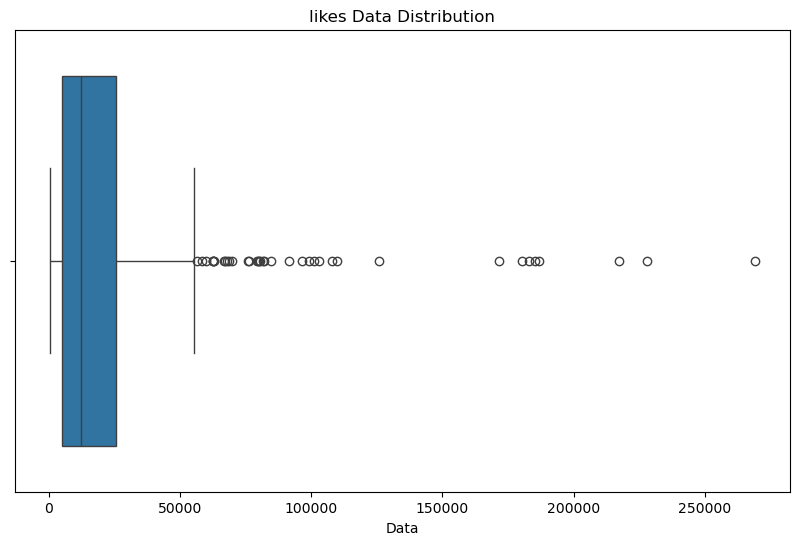

In [33]:
# Remove rows where 'birth_year' is zero before applying the function
lex_df_temp = lex_df[lex_df['likes'] != 0]

# Print max and min values
print(lex_df_temp['likes'].describe())
print()

# Now apply the outlier_box_plot function
outliers = outlier_box_plot(lex_df_temp, 'likes', 1.5)

In [34]:
# Check instances of views more than 56,370 likes
lex_df[lex_df['likes'] > 56370].sort_values('likes', ascending=False)

,yt_url,number,guest,nationality,profession,birth_year,death_year,birth_year_estimated,summary,description,...,duration_minutes,views,likes,comments_count,tags,top_five_words,favorite_count,region_restriction,thumbnail_url,captions_availability
411,https://www.youtube.com/watch?v=f_lRdkH_QoY,414,Tucker Carlson,American,Political Commentator,1969,0,False,"Putin, Navalny, Trump, CIA, NSA, War, Politics...",Tucker Carlson is a highly-influential politic...,...,184.366667,16288203,268977,60877,"['agi', 'ai', 'ai podcast', 'artificial intell...","putin-71, us-69, country-67, true-63, right-61",0,NaN,https://i.ytimg.com/vi/f_lRdkH_QoY/hqdefault.jpg,True
439,https://www.youtube.com/watch?v=qCbfTN-caFI,442,Donald Trump,Former,President,1946,0,False,NaN,Donald Trump is the 45th President of the Unit...,...,64.300000,6268026,227993,59812,"['Donald Trump', 'alex friedman', 'lex ai', 'l...","right-33, country-31, done-22, big-18, electio...",0,NaN,https://i.ytimg.com/vi/qCbfTN-caFI/hqdefault.jpg,True
407,https://www.youtube.com/watch?v=tYrdMjVXyNg,410,Ben Shapiro,American,Political Commentator,1984,0,False,"Politics, Jan 6, Israel, Ukraine & Wokeism",Ben Shapiro is a conservative political commen...,...,140.083333,11525515,217423,59345,"['agi', 'ai', 'ai podcast', 'artificial intell...","trump-141, right-104, israel-92, biden-89, gov...",0,NaN,https://i.ytimg.com/vi/tYrdMjVXyNg/hqdefault.jpg,True
397,https://www.youtube.com/watch?v=JN3KPFbWCy8,400,Elon Musk,American-South African,Entrepreneur,1971,0,False,"War, AI, Aliens, Politics, Physics, Video Game...","Elon Musk is CEO of X, xAI, SpaceX, Tesla, Neu...",...,136.783333,12308958,186949,21938,"['agi', 'ai', 'ai podcast', 'artificial intell...","laughing-77, elon-73, war-49, ai-40, right-30",0,NaN,https://i.ytimg.com/vi/JN3KPFbWCy8/hqdefault.jpg,True
249,https://www.youtube.com/watch?v=DxREm3s1scA,252,Elon Musk,American-South African,Entrepreneur,1971,0,False,"SpaceX, Mars, Tesla Autopilot, Self-Driving, R...","Elon Musk is CEO of SpaceX, Tesla, Neuralink, ...",...,151.800000,10823189,185136,16950,"['agi', 'ai', 'ai podcast', 'artificial intell...","human-47, space-46, problem-41, history-38, ma...",0,NaN,https://i.ytimg.com/vi/DxREm3s1scA/hqdefault.jpg,True
310,https://www.youtube.com/watch?v=sY8aFSY2zv4,313,Jordan Peterson,Canadian,Psychologist,1962,0,False,"Life, Death, Power, Fame, and Meaning","Jordan Peterson is a psychologist, lecturer, p...",...,183.550000,15789816,182945,20446,"['Canada', 'Dostoevsky', 'Justin Trudeau', 'Ni...","right-121, talk-53, sense-48, question-43, hum...",0,NaN,https://i.ytimg.com/vi/sY8aFSY2zv4/hqdefault.jpg,True
297,https://www.youtube.com/watch?v=gk4tEO4jDUM,300,Joe Rogan,American,Comedian,1967,0,False,"Comedy, Controversy, Aliens, UFOs, Putin, CIA,...","Joe Rogan is a comedian, UFC commentator, and ...",...,101.350000,10655213,180286,15694,"['agi', 'ai', 'ai podcast', 'artificial intell...","joe-97, right-42, person-35, comedy-34, shit-29",0,NaN,https://i.ytimg.com/vi/gk4tEO4jDUM/hqdefault.jpg,True
329,https://www.youtube.com/watch?v=4AWLcxTGZPA,332,Kanye 'Ye',American,Artist,1977,0,False,NaN,"Ye is a legendary artist, producer, and design...",...,146.500000,5441161,171450,59865,"['agi', 'ai', 'ai podcast', 'artificial intell...",no captions available,0,NaN,https://i.ytimg.com/vi/4AWLcxTGZPA/hqdefault.jpg,False
307,https://www.youtube.com/watch?v=T3FC7qIAGZk,310,Andrew Bustamante,American,Former Intelligence Officer,1981,0,False,CIA Spy,Andrew Bustamante is a former CIA covert intel...,...,233.150000,18730585,126034,24570,"['agi', 'ai', 'ai podcast', 'andrew bustamante...","intelligence-130, cia-127, right-111, ukraine-...",0,NaN,https://i.ytimg.com/vi/T3FC7qIAGZk/hqdefault.jpg,True
364,https://www.youtube.com/watch?v=L_Guz73e6fw,367,Sam Altman,American,Entrepreneur,1985,0,False,"OpenAI CEO on GPT-4, ChatGPT, and the Future o...","Sam Altman is the CEO of OpenAI, the company b...",...,143.950000,6554631,109749,11538,"['agi', 'ai', 'ai podcast', 'artifi

**Comments Counts**

count      449.000000
mean      3370.334076
std       7128.918495
min         29.000000
25%        443.000000
50%       1369.000000
75%       3383.000000
max      60877.000000
Name: comments_count, dtype: float64

Mean: 3370.3340757238307
Median: 1369.0

Lower limit is: -3967.0
Upper limit is: 7793.0


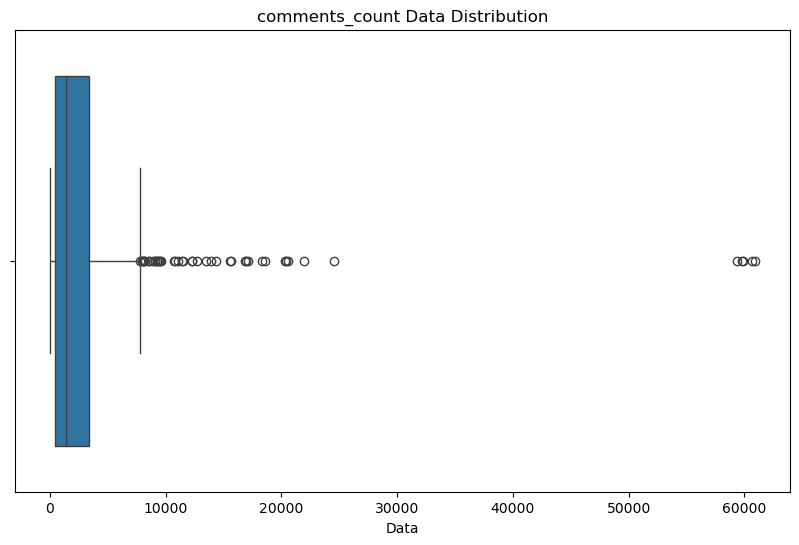

In [35]:
# Remove rows where 'birth_year' is zero before applying the function
lex_df_temp = lex_df[lex_df['comments_count'] != 0]

# Print max and min values
print(lex_df_temp['comments_count'].describe())
print()

# Now apply the outlier_box_plot function
outliers = outlier_box_plot(lex_df_temp, 'comments_count', 1.5)

In [36]:
# Check instances of views more than 7,793 comments
lex_df[lex_df['comments_count'] > 7793].sort_values('comments_count', ascending=False)

,yt_url,number,guest,nationality,profession,birth_year,death_year,birth_year_estimated,summary,description,...,duration_minutes,views,likes,comments_count,tags,top_five_words,favorite_count,region_restriction,thumbnail_url,captions_availability
411,https://www.youtube.com/watch?v=f_lRdkH_QoY,414,Tucker Carlson,American,Political Commentator,1969,0,False,"Putin, Navalny, Trump, CIA, NSA, War, Politics...",Tucker Carlson is a highly-influential politic...,...,184.366667,16288203,268977,60877,"['agi', 'ai', 'ai podcast', 'artificial intell...","putin-71, us-69, country-67, true-63, right-61",0,NaN,https://i.ytimg.com/vi/f_lRdkH_QoY/hqdefault.jpg,True
415,https://www.youtube.com/watch?v=1X_KdkoGxSs,418,"Norman Finkelstein, Destiny, M. Rabbani & Benn...",Mixed,Mixed,0,0,False,"Finkelstein, Destiny, M. Rabbani & Benny Morris",Norman Finkelstein and Benny Morris are histor...,...,297.250000,3450546,67991,60633,"['agi', 'ai', 'ai podcast', 'artificial intell...","state-193, israel-186, arab-140, jews-137, jew...",0,NaN,https://i.ytimg.com/vi/1X_KdkoGxSs/hqdefault.jpg,True
329,https://www.youtube.com/watch?v=4AWLcxTGZPA,332,Kanye 'Ye',American,Artist,1977,0,False,NaN,"Ye is a legendary artist, producer, and design...",...,146.500000,5441161,171450,59865,"['agi', 'ai', 'ai podcast', 'artificial intell...",no captions available,0,NaN,https://i.ytimg.com/vi/4AWLcxTGZPA/hqdefault.jpg,False
439,https://www.youtube.com/watch?v=qCbfTN-caFI,442,Donald Trump,Former,President,1946,0,False,NaN,Donald Trump is the 45th President of the Unit...,...,64.300000,6268026,227993,59812,"['Donald Trump', 'alex friedman', 'lex ai', 'l...","right-33, country-31, done-22, big-18, electio...",0,NaN,https://i.ytimg.com/vi/qCbfTN-caFI/hqdefault.jpg,True
407,https://www.youtube.com/watch?v=tYrdMjVXyNg,410,Ben Shapiro,American,Political Commentator,1984,0,False,"Politics, Jan 6, Israel, Ukraine & Wokeism",Ben Shapiro is a conservative political commen...,...,140.083333,11525515,217423,59345,"['agi', 'ai', 'ai podcast', 'artificial intell...","trump-141, right-104, israel-92, biden-89, gov...",0,NaN,https://i.ytimg.com/vi/tYrdMjVXyNg/hqdefault.jpg,True
307,https://www.youtube.com/watch?v=T3FC7qIAGZk,310,Andrew Bustamante,American,Former Intelligence Officer,1981,0,False,CIA Spy,Andrew Bustamante is a former CIA covert intel...,...,233.150000,18730585,126034,24570,"['agi', 'ai', 'ai podcast', 'andrew bustamante...","intelligence-130, cia-127, right-111, ukraine-...",0,NaN,https://i.ytimg.com/vi/T3FC7qIAGZk/hqdefault.jpg,True
397,https://www.youtube.com/watch?v=JN3KPFbWCy8,400,Elon Musk,American-South African,Entrepreneur,1971,0,False,"War, AI, Aliens, Politics, Physics, Video Game...","Elon Musk is CEO of X, xAI, SpaceX, Tesla, Neu...",...,136.783333,12308958,186949,21938,"['agi', 'ai', 'ai podcast', 'artificial intell...","laughing-77, elon-73, war-49, ai-40, right-30",0,NaN,https://i.ytimg.com/vi/JN3KPFbWCy8/hqdefault.jpg,True
283,https://www.youtube.com/watch?v=ygAqYC8JOQI,286,Oliver Stone,American,Director,1946,0,False,Vladimir Putin and War in Ukraine,Oliver Stone is a filmmaker with 3 Oscar wins ...,...,112.650000,4018263,67262,20546,"['agi', 'ai', 'ai podcast', 'artificial intell...",no captions available,0,NaN,https://i.ytimg.com/vi/ygAqYC8JOQI/hqdefault.jpg,False
310,https://www.youtube.com/watch?v=sY8aFSY2zv4,313,Jordan Peterson,Canadian,Psychologist,1962,0,False,"Life, Death, Power, Fame, and Meaning","Jordan Peterson is a psychologist, lecturer, p...",...,183.550000,15789816,182945,20446,"['Canada', 'Dostoevsky', 'Justin Trudeau', 'Ni...","right-121, talk-53, sense-48, question-43, hum...",0,NaN,https://i.ytimg.com/vi/sY8aFSY2zv4/hqdefault.jpg,True
333,https://www.youtube.com/watch?v=AF8DOS4C2KM,336,Ben Shapiro,American,Political Commentator,1984,0,False,"Politics, Kanye, Trump, Biden, Hitler, Extremi...",Ben Shapiro is a conservative political commen...,...,151.416667,8625865,102843,20329,"['Ben Shapiro', 'alex friedman', 'lex ai', 'le...","right-104, h

After checking if the view, like, and comment counts are not error, I will not be removing them as they represent genuine user engagement.

### Data type converstions and extractions

In [37]:
# Convert the upload date to a date object
lex_df['upload_date'] = pd.to_datetime(lex_df['upload_date'], errors='coerce')

# Extract the year, month, and week day from the upload date
lex_df['upload_year'] = lex_df['upload_date'].dt.year
lex_df['upload_month'] = lex_df['upload_date'].dt.strftime('%b')
lex_df['upload_weekday'] = lex_df['upload_date'].dt.strftime('%a')

# Show the first few rows of the dataframe
lex_df[['guest','upload_date', 'upload_year', 'upload_month', 'upload_weekday']].head()

,guest,upload_date,upload_year,upload_month,upload_weekday
0,Max Tegmark,2018-04-19 14:11:52+00:00,2018,Apr,Thu
1,Christof Koch,2018-05-29 13:16:25+00:00,2018,May,Tue
2,Steven Pinker,2018-10-17 15:45:42+00:00,2018,Oct,Wed
3,Yoshua Bengio,2018-10-20 18:42:27+00:00,2018,Oct,Sat
4,Vladimir Vapnik,2018-11-16 15:52:20+00:00,2018,Nov,Fri


### Feature Engineering

I will create new features using the data I have collected. These features will include:

**1. Duration in Days Between Release Dates:** I'll calculate the duration between each episode and the subsequent one to assess consistency, release frequency, and identify any gaps or hiatuses in publishing.

**2. Episode Upload Time of Day (Austin, Texas time zone):** The upload time will be adjusted to Austin, Texas time (where the podcaster resides) to categorize episodes by the time of day they were released:

| Time of Day      | Time Range                |
|------------------|---------------------------|
| **Early Morning** | 05:00 AM - 8:59 AM        |
| **Morning**       | 09:00 AM - 11:59 AM       |
| **Afternoon**     | 12:00 PM - 4:59 PM        |
| **Evening**       | 05:00 PM - 8:59 PM        |
| **Night**         | 09:00 PM - 11:59 PM       |
| **Late Night**    | 12:00 AM - 4:59 AM        |

**3. Seasonality Analysis:** I'll analyze the data for any seasonal patterns or trends, identifying if certain times of the year impact viewership or engagement.

**4. Like Engagement Ratio:** The Like Engagement Ratio measures how much positive feedback (likes) a video receives for each view.


$$
\text{Like Engagement Ratio} = \frac{\text{Likes}}{\text{Views}}
$$

- **Higher Like Engagement Ratio**: Indicates a high level of approval from viewers, suggesting that the content is well-received.
- **Lower Like Engagement Ratio**: Suggests that the content is not generating much positive feedback relative to its viewership, possibly indicating neutral or negative reception.


**5. Comment Engagement Ratio:** The Comment Engagement Ratio measures how much discussion (comments) a video receives for each view.

$$
\text{Comment Engagement Ratio} = \frac{\text{Comments}}{\text{Views}}
$$

- **Higher Comment Engagement Ratio**: Suggests that the video is generating a lot of discussion and engagement, possibly indicating controversial or thought-provoking content.
- **Lower Comment Engagement Ratio**: Implies that the video is not sparking much conversation, potentially indicating less controversial or more straightforward content.


**6. Content Impact:** The Content Impact metric is an average of the Like Engagement Ratio and Comment Engagement Ratio, providing a holistic view of how both approval and discussion contribute to the content’s overall engagement.

$$
\text{Content Impact} = \frac{\frac{\text{Likes}}{\text{Views}} + \frac{\text{Comments}}{\text{Views}}}{2}
$$

- **Higher Content Impact**: Indicates a video that is both well-liked and generating a lot of discussion, which generally reflects strong overall engagement.
- **Lower Content Impact**: Suggests the video is either not well-liked or not generating much discussion, signaling weaker viewer engagement or less resonance with the audience.

**7. Normalized Engagement Score:** To understand how engaging each video is on a per-viewer basis, I'll calculate a normalized engagement score using the formula:

$$
\text{Normalized Engagement Score} = \frac{(\text{Likes} \times 10) + (\text{Comments} \times 20)}{\text{Views}}
$$

This gives more weight to likes and comments, reflecting the value of active interaction—especially comments, which often indicate deeper engagement.
<br>
<br>
<br>
<br>
<br>
<br>

**1. Duration in Days Between Release Dates:**

In [38]:
# Create a new column for the duration in days between each episode and the one before it
lex_df['upload_date_diff'] = (lex_df['upload_date'] - lex_df['upload_date'].shift(1)).dt.days

# Replace NaN values (from the first row) with a default integer value (e.g., 0 or -1)
lex_df['upload_date_diff'] = lex_df['upload_date_diff'].fillna(0).astype(int)

# Show the first few rows to check the outcome
lex_df[['upload_date', 'upload_date_diff']].tail(10)

,upload_date,upload_date_diff
439,2024-09-03 16:21:05+00:00,4
440,2024-09-12 19:05:50+00:00,9
441,2024-09-20 20:30:55+00:00,8
442,2024-09-25 17:59:15+00:00,4
443,2024-09-30 17:23:24+00:00,4
444,2024-10-06 18:43:14+00:00,6
445,2024-10-11 18:03:40+00:00,4
446,2024-10-16 12:16:21+00:00,4
447,2024-10-23 20:19:21+00:00,7
448,2024-10-30 18:06:12+00:00,6


**2. Episode Upload Time of Day (Austin, Texas time zone):**

In [39]:
# Define the timezone for Texas
texas_tz = pytz.timezone('America/Chicago')

# Time of day of the episode based on the timestamp
def get_time_of_day(timestamp):
    hour = timestamp.hour
    
    if 5 <= hour < 9:
        return 'Early Morning'
    elif 9 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    elif 21 <= hour < 24:
        return 'Night'
    else:  # 0-5
        return 'Late Night'

# Convert the upload_date to Texas timezone
def convert_to_texas_timezone(timestamp):
    if timestamp is not None:
        return timestamp.astimezone(texas_tz)
    return None

# Apply timezone conversion to get upload_date_tx
lex_df['upload_date_tx'] = lex_df['upload_date'].apply(convert_to_texas_timezone)

# Create the 'upload_time_of_day_tx' column based on the upload_date_tx
lex_df['upload_time_of_day_tx'] = lex_df['upload_date_tx'].apply(get_time_of_day)

# Show the first few rows to check the outcome
lex_df[['guest', 'upload_date', 'upload_date_tx', 'upload_time_of_day_tx']].head(10)

,guest,upload_date,upload_date_tx,upload_time_of_day_tx
0,Max Tegmark,2018-04-19 14:11:52+00:00,2018-04-19 09:11:52-05:00,Morning
1,Christof Koch,2018-05-29 13:16:25+00:00,2018-05-29 08:16:25-05:00,Early Morning
2,Steven Pinker,2018-10-17 15:45:42+00:00,2018-10-17 10:45:42-05:00,Morning
3,Yoshua Bengio,2018-10-20 18:42:27+00:00,2018-10-20 13:42:27-05:00,Afternoon
4,Vladimir Vapnik,2018-11-16 15:52:20+00:00,2018-11-16 09:52:20-06:00,Morning
5,Guido van Rossum,2018-11-22 17:10:18+00:00,2018-11-22 11:10:18-06:00,Morning
6,Jeff Atwood,2018-11-29 15:49:28+00:00,2018-11-29 09:49:28-06:00,Morning
7,Eric Schmidt,2018-12-04 16:14:28+00:00,2018-12-04 10:14:28-06:00,Morning
8,Stuart Russell,2018-12-09 16:47:24+00:00,2018-12-09 10:47:24-06:00,Morning
9,Pieter Abbeel,2018-12-16 19:50:11+00:00,2018-12-16 13:50:11-06:00,Afternoon


**3. Seasonality Analysis:** 

In [40]:
# Function to determine the season based on the month of the upload date
def determine_season(upload_date):
    # Extract the year and month from the upload date
    month = upload_date.month
    
    # Determine the season based on the month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Unknown'

# Apply the determine_season function to the 'upload_date' column
lex_df['upload_season'] = lex_df['upload_date_tx'].apply(determine_season)

# Display the first few rows to verify the outcome
lex_df[['guest', 'upload_date_tx', 'upload_season']].head(10)

,guest,upload_date_tx,upload_season
0,Max Tegmark,2018-04-19 09:11:52-05:00,Spring
1,Christof Koch,2018-05-29 08:16:25-05:00,Spring
2,Steven Pinker,2018-10-17 10:45:42-05:00,Fall
3,Yoshua Bengio,2018-10-20 13:42:27-05:00,Fall
4,Vladimir Vapnik,2018-11-16 09:52:20-06:00,Fall
5,Guido van Rossum,2018-11-22 11:10:18-06:00,Fall
6,Jeff Atwood,2018-11-29 09:49:28-06:00,Fall
7,Eric Schmidt,2018-12-04 10:14:28-06:00,Winter
8,Stuart Russell,2018-12-09 10:47:24-06:00,Winter
9,Pieter Abbeel,2018-12-16 13:50:11-06:00,Winter


**4. Like Engagement Ratio:**

In [41]:
# Create new column for like / view ratio
lex_df['like_view'] = lex_df['likes'] / lex_df['views']

# Normalize the 'like_view' column and overwrite it
scaler = MinMaxScaler()
lex_df['like_view'] = scaler.fit_transform(lex_df[['like_view']])

# Show the first few rows to check the outcome
lex_df[['guest', 'views', 'likes', 'like_view']].tail(10)

,guest,views,likes,like_view
439,Donald Trump,6268026,227993,0.890608
440,Gregory Aldrete,3755496,43979,0.208653
441,Vejas Liulevicius,909253,10610,0.207502
442,Vivek Ramaswamy,770550,20913,0.635294
443,Ed Barnhart,2750975,25303,0.139175
444,Cursor Team,488086,9397,0.417198
445,Jordan Peterson,1132848,25316,0.502762
446,Graham Hancock,2656311,43799,0.340770
447,Bernie Sanders,1218968,23415,0.415985
448,Rick Spence,901686,14696,0.335508


**5. Comment Engagement Ratio:** 

In [42]:
# Create new column for count / view ratio
lex_df['comment_view'] = lex_df['comments_count'] / lex_df['views']

# Normalize the 'like_view' column and overwrite it
scaler = MinMaxScaler()
lex_df['comment_view'] = scaler.fit_transform(lex_df[['comment_view']])

# Show the first few rows to check the outcome
lex_df[['guest', 'views', 'comments_count', 'comment_view']].tail(10)


,guest,views,comments_count,comment_view
439,Donald Trump,6268026,59812,0.533600
440,Gregory Aldrete,3755496,3773,0.037686
441,Vejas Liulevicius,909253,1638,0.083969
442,Vivek Ramaswamy,770550,6031,0.433954
443,Ed Barnhart,2750975,2801,0.038471
444,Cursor Team,488086,881,0.084174
445,Jordan Peterson,1132848,4191,0.194217
446,Graham Hancock,2656311,7821,0.150350
447,Bernie Sanders,1218968,5665,0.249273
448,Rick Spence,901686,2037,0.110550


**6. Content Impact:**

In [43]:
# Calculate the average to create the content_impact column
lex_df['content_impact'] = (lex_df['like_view'] + lex_df['comment_view']) / 2

# Show the first few rows to check the outcome
lex_df[['guest', 'views', 'likes', 'comments_count', 'like_view', 'comment_view', 'content_impact']].tail(10)

,guest,views,likes,comments_count,like_view,comment_view,content_impact
439,Donald Trump,6268026,227993,59812,0.890608,0.533600,0.712104
440,Gregory Aldrete,3755496,43979,3773,0.208653,0.037686,0.123170
441,Vejas Liulevicius,909253,10610,1638,0.207502,0.083969,0.145735
442,Vivek Ramaswamy,770550,20913,6031,0.635294,0.433954,0.534624
443,Ed Barnhart,2750975,25303,2801,0.139175,0.038471,0.088823
444,Cursor Team,488086,9397,881,0.417198,0.084174,0.250686
445,Jordan Peterson,1132848,25316,4191,0.502762,0.194217,0.348489
446,Graham Hancock,2656311,43799,7821,0.340770,0.150350,0.245560
447,Bernie Sanders,1218968,23415,5665,0.415985,0.249273,0.332629
448,Rick Spence,901686,14696,2037,0.335508,0.110550,0.223029


**7. Normalized Engagement Score:**

In [44]:
# Calculate the engagement score per view (normalized)
lex_df['engagement'] = ((lex_df['likes'] * 10) + (lex_df['comments_count'] * 20))/ (lex_df['views'])

# Show the first few rows to check the outcome
lex_df[['guest', 'views', 'likes', 'comments_count', 'like_view', 'comment_view', 'content_impact', 'engagement']].tail(10)

,guest,views,likes,comments_count,like_view,comment_view,content_impact,engagement
439,Donald Trump,6268026,227993,59812,0.890608,0.533600,0.712104,0.554588
440,Gregory Aldrete,3755496,43979,3773,0.208653,0.037686,0.123170,0.137199
441,Vejas Liulevicius,909253,10610,1638,0.207502,0.083969,0.145735,0.152719
442,Vivek Ramaswamy,770550,20913,6031,0.635294,0.433954,0.534624,0.427941
443,Ed Barnhart,2750975,25303,2801,0.139175,0.038471,0.088823,0.112342
444,Cursor Team,488086,9397,881,0.417198,0.084174,0.250686,0.228628
445,Jordan Peterson,1132848,25316,4191,0.502762,0.194217,0.348489,0.297463
446,Graham Hancock,2656311,43799,7821,0.340770,0.150350,0.245560,0.223773
447,Bernie Sanders,1218968,23415,5665,0.415985,0.249273,0.332629,0.285036
448,Rick Spence,901686,14696,2037,0.335508,0.110550,0.223029,0.208166


### Dataframe column rearrangement

In [45]:
# Names of the columns in the DataFrame
lex_df.columns

Index(['yt_url', 'number', 'guest', 'nationality', 'profession', 'birth_year',
       'death_year', 'birth_year_estimated', 'summary', 'description',
       'upload_date', 'duration', 'duration_minutes', 'views', 'likes',
       'comments_count', 'tags', 'top_five_words', 'favorite_count',
       'region_restriction', 'thumbnail_url', 'captions_availability',
       'upload_year', 'upload_month', 'upload_weekday', 'upload_date_diff',
       'upload_date_tx', 'upload_time_of_day_tx', 'upload_season', 'like_view',
       'comment_view', 'content_impact', 'engagement'],
      dtype='object')

In [46]:
# Re-arrange the dataframe columns
lex_df = lex_df[['yt_url', 'number', 'guest', 'nationality', 'profession', 'birth_year', 'death_year', 'birth_year_estimated', 
                   'summary', 'description', 'upload_date', 'upload_date_tx', 'upload_time_of_day_tx', 'upload_date_diff', 
                   'upload_weekday', 'upload_month', 'upload_season', 'upload_year', 'duration', 'duration_minutes', 'views', 
                   'likes', 'comments_count',  'like_view', 'comment_view', 'content_impact', 'engagement', 'tags', 'top_five_words',
                    'favorite_count', 'region_restriction', 'thumbnail_url', 'captions_availability']]

In [47]:
# Export the data frame into a csv file in order to do my analysis on Tableau
lex_df.to_csv('lex_fridman_podcast_analysis.csv', encoding='utf-8-sig', index=False)